# COLLECTING DATA

In [27]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from math import *

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import jaccard_similarity_score,accuracy_score,confusion_matrix,classification_report,log_loss

In [28]:
# Reading data
data=pd.read_csv('ChurnData.csv')
data.head(10)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,20.70,...,0.0,0.0,0.0,0.0,0.0,3.030,3.240,4.787,1.0,0.0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,8.25,...,0.0,1.0,1.0,1.0,1.0,2.110,3.157,3.611,4.0,0.0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,2.90,...,0.0,0.0,0.0,0.0,0.0,1.065,3.240,2.833,1.0,0.0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,6.50,...,0.0,0.0,1.0,1.0,0.0,1.872,3.314,4.942,3.0,0.0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,12.85,...,0.0,1.0,1.0,0.0,1.0,2.553,3.248,4.143,2.0,0.0


In [29]:
# Converting churn column from float to int
data['churn']=data['churn'].astype('int')
data.head(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0


In [30]:
data.shape

(200, 28)

# ANALYSING THE DATA

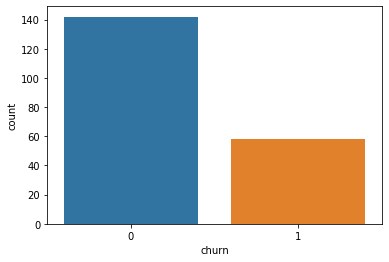

In [31]:
# KNOWING THE CHURN STATUS OF THE EMPLOY
sb.countplot(x='churn',data=data)

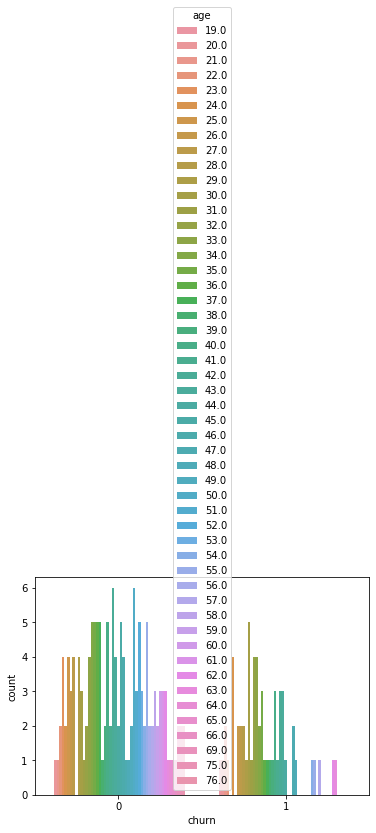

In [32]:
# CHURN STATUS W.R.T AGE
sb.countplot(x='churn',hue='age',data=data)

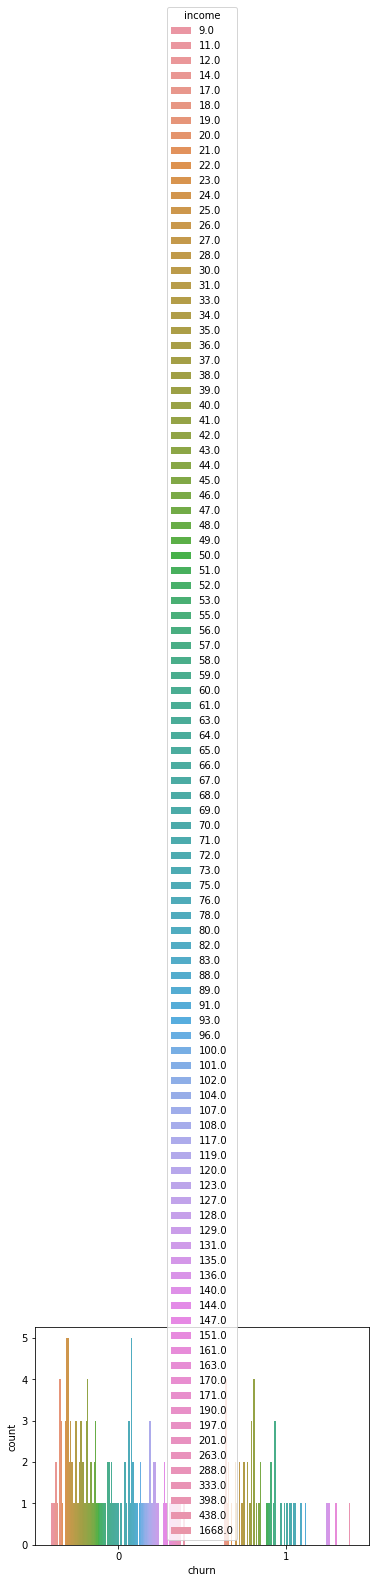

In [33]:
# Churn based on income
sb.countplot(x='churn',hue='income',data=data,linewidth=10)

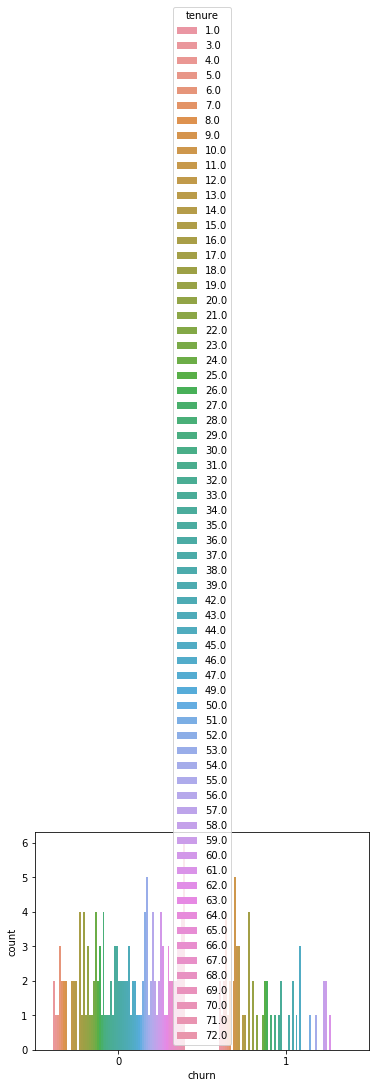

In [34]:
# Churn based on tenure
sb.countplot(x='churn',hue='tenure',data=data)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

# DATA WRANGLING

In [36]:
data.isnull()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
# SINCE THERE ARE NO NAN VALUES , HERE WE DON'T DEAL WITH ELIMINATING NAN

In [38]:
# Selecting necessary features as input in matrix form
x=np.asanyarray(data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y=np.asanyarray(data[['churn']])
print(x.shape,y.shape,sep='\n')

(200, 7)
(200, 1)


# TRAIN AND TEST THE MODEL

In [39]:
# Normalizing the features to increase the accuracy
x = preprocessing.StandardScaler().fit(x).transform(x)
print(x.shape)

(200, 7)


In [40]:
# Split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=4)
print(x_train,x_train.shape,y_train,y_train.shape,x_test,x_test.shape,y_test,y_test.shape,sep='\n')

[[ 1.04207196e+00 -3.19302169e-01 -6.56272192e-01 -8.68791493e-02
   9.16299467e-01 -2.49020471e-01  1.16316000e+00]
 [-3.47666151e-01 -9.32607656e-01 -7.54959740e-01 -4.06919142e-01
   1.36470133e-01 -5.84778410e-01 -8.59726954e-01]
 [-1.27415823e+00 -1.46924996e+00 -8.53647287e-01 -3.91307435e-01
   9.16299467e-01 -1.14437497e+00 -8.59726954e-01]
 [-1.50578124e+00 -1.31592358e+00 -9.52334835e-01 -4.30336703e-01
  -6.43359200e-01 -8.08617036e-01 -8.59726954e-01]
 [ 1.61904490e-01  4.47329689e-01 -1.05102238e+00 -5.56557354e-02
   9.16299467e-01 -2.51818454e-02 -8.59726954e-01]
 [-7.18262981e-01 -1.23926040e+00 -7.54959740e-01 -3.28860608e-01
   9.16299467e-01 -1.14437497e+00 -8.59726954e-01]
 [-5.32964566e-01 -1.23926040e+00 -8.53647287e-01 -3.67889875e-01
   9.16299467e-01 -1.14437497e+00  1.16316000e+00]
 [-1.41313204e+00  2.17340132e-01 -6.56272192e-01  6.14320670e-02
  -1.42318853e+00  6.46334032e-01  1.16316000e+00]
 [ 1.61904490e-01  1.36728792e+00  8.24041023e-01  1.24337098e+0

In [41]:
# Finding the best parameters by optimizing algorithm
lr=linear_model.LogisticRegression()
lr.fit(x_train,y_train[:,0])
print(lr.intercept_,lr.coef_)

[-1.45060749] [[-0.78140976 -0.31050242 -0.03005249 -0.02136835  0.09764774 -0.0738218
   0.84450907]]


In [42]:
# Testing the model with test dataset
predict=lr.predict(x_test)
print(predict)

[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1]


In [43]:
# Getting the probability of each row
predict_prob=lr.predict_proba(x_test)
print(predict_prob.shape,predict_prob,sep='\n')

(66, 2)
[[0.690706   0.309294  ]
 [0.93616806 0.06383194]
 [0.85117005 0.14882995]
 [0.94068161 0.05931839]
 [0.86575908 0.13424092]
 [0.78528422 0.21471578]
 [0.79082462 0.20917538]
 [0.90809289 0.09190711]
 [0.26365766 0.73634234]
 [0.94835858 0.05164142]
 [0.80279468 0.19720532]
 [0.85737643 0.14262357]
 [0.63186677 0.36813323]
 [0.3130784  0.6869216 ]
 [0.91929973 0.08070027]
 [0.56039909 0.43960091]
 [0.63600344 0.36399656]
 [0.68151945 0.31848055]
 [0.61517371 0.38482629]
 [0.79959007 0.20040993]
 [0.91371151 0.08628849]
 [0.71060953 0.28939047]
 [0.96456774 0.03543226]
 [0.6131913  0.3868087 ]
 [0.59349881 0.40650119]
 [0.97005809 0.02994191]
 [0.55035939 0.44964061]
 [0.66818205 0.33181795]
 [0.74093614 0.25906386]
 [0.97721257 0.02278743]
 [0.96314965 0.03685035]
 [0.73324831 0.26675169]
 [0.30931579 0.69068421]
 [0.96448879 0.03551121]
 [0.93511877 0.06488123]
 [0.90909454 0.09090546]
 [0.22946584 0.77053416]
 [0.73213103 0.26786897]
 [0.90595551 0.09404449]
 [0.68887122 0.31

# EVALUATION

In [46]:
# USING JACCARD INDEX
jaccard_similarity_score(y_test,predict)*100

75.75757575757575

In [47]:
# ACCURACY SCORE
accuracy_score(y_test,predict)*100

75.75757575757575

In [48]:
# CONFUSION MATRIX
confusion_matrix(y_test,predict)

array([[44,  1],
       [15,  6]], dtype=int64)

In [49]:
# precision and F-1 Value
print (classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85        45
           1       0.86      0.29      0.43        21

    accuracy                           0.76        66
   macro avg       0.80      0.63      0.64        66
weighted avg       0.78      0.76      0.71        66



In [50]:
# LOG-LoSS
log_loss(y_test,predict)

8.373048816909108